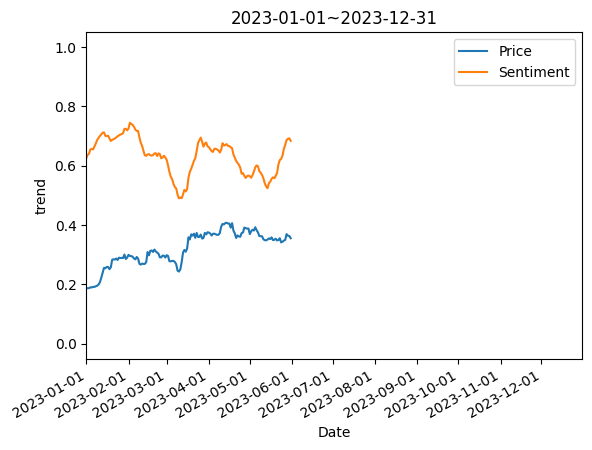

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler

def show_trend(start, end, flag):
    if flag == 1:
        plt.figure(figsize=(60, 20))
    plt.plot(dates, prices,label='Price')
    # plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    # plt.gcf().autofmt_xdate()
    # plt.xlabel('Date')
    # plt.ylabel('Price')
    # plt.title('Price Trend')
    # plt.xlim(pd.Timestamp(START), pd.Timestamp(END))


    plt.plot(sen_dates, trend,label='Sentiment')
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gcf().autofmt_xdate()
    plt.xlabel('Date')
    plt.ylabel('trend')
    plt.title(start+'~'+end)
    plt.xlim(pd.Timestamp(start), pd.Timestamp(end))
    plt.legend()
    plt.savefig(start + '.pdf', format='pdf', bbox_inches='tight')
    plt.show()
    

    
data = pd.read_csv('./combined/sentiment_mean.csv')

scaler = MinMaxScaler()
data[['Close']]= scaler.fit_transform(data[['Close']])
data[['metrics']]= scaler.fit_transform(data[['metrics']])

window_size = 14 # 窗口大小
data['metrics'] = data['metrics'].rolling(window_size).mean()

data['date'] = pd.to_datetime(data['date'])
trend = data['metrics'].tolist()
prices = data['Close'].tolist()
sen_dates = data['date'].tolist()
dates = data['date'].tolist()
show_trend('2023-01-01', '2023-12-31',0)